In [1]:
# change working directory
import os
os.chdir('F:\\Lydia\\Study\\Udacity\\Project1\\Suicide')
os.getcwd()

In [2]:
# import toolbox
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import plotly.graph_objects as go
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
%matplotlib inline

In [3]:
#check data
df = pd.read_csv('suicide_data.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
#checking missing data
df.shape

(27820, 12)

In [5]:
df.notnull().sum()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
country-year          27820
HDI for year           8364
 gdp_for_year ($)     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

In [6]:
#drop useless columns
df_new=df.drop(['HDI for year','country-year',' gdp_for_year ($) '],axis=1)

In [7]:
df_new.notnull().sum()

country               27820
year                  27820
sex                   27820
age                   27820
suicides_no           27820
population            27820
suicides/100k pop     27820
gdp_per_capita ($)    27820
generation            27820
dtype: int64

In [8]:
df_new.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [9]:
# first question. suicide number change with time
suicide_year=df_new.groupby(['year'])['suicides/100k pop','suicides_no'].mean()
suicide_year=suicide_year.reset_index()
suicide_year.head()

C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,year,suicides/100k pop,suicides_no
0,1985,11.826198,201.498264
1,1986,11.423333,209.496528
2,1987,11.644213,195.743827
3,1988,12.709405,205.826531
4,1989,12.879071,256.801282


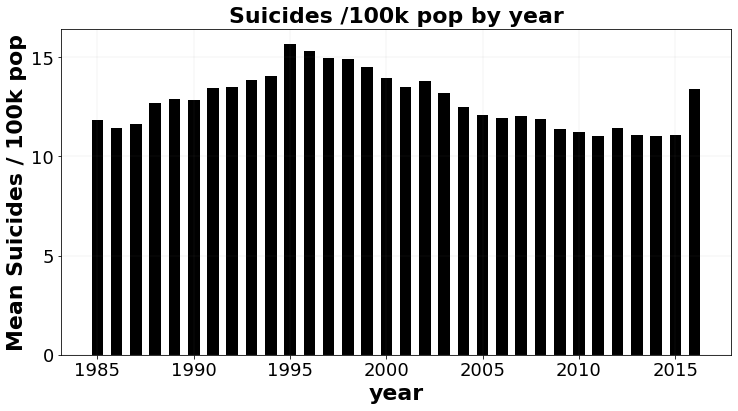

In [11]:
#barplot
fig,ax=plt.subplots(figsize=(12,6))
ax.bar(suicide_year['year'],suicide_year['suicides/100k pop'],color='black',
       width = 0.6)
ax.grid(b=True,color='grey',alpha=0.3,linewidth=0.3)
ax.set_title('Suicides /100k pop by year',fontsize=22,fontweight='bold')
plt.xlabel('year',fontsize=22,fontweight='bold')
plt.ylabel('Mean Suicides / 100k pop',fontsize=22,fontweight='bold')
plt.xticks(np.arange(min(suicide_year['year']),max(suicide_year['year'])+1,5),fontsize = 18)
plt.yticks(np.arange(0,max(suicide_year['suicides/100k pop']),5),fontsize = 18)
plt.show()
fig.savefig("figure 1.jpg")

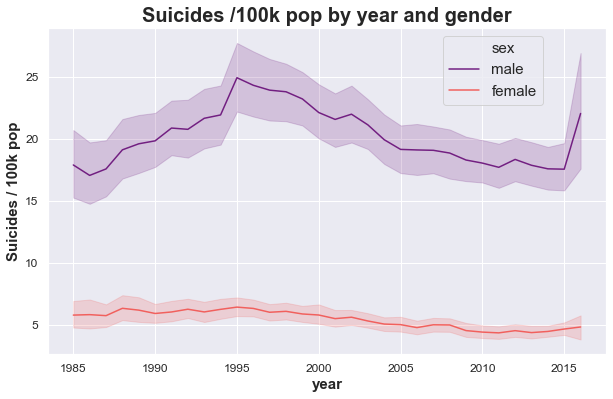

In [14]:
#gender difference lineplot

plt.figure(figsize=(10,6))
g=sns.lineplot(data=df_new,x='year',y='suicides/100k pop',hue='sex',estimator='mean',palette="magma",markers=True).set_title('Suicides /100k pop by year and gender',fontsize=20,fontweight='bold')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel('year',fontsize=15,fontweight='bold')
plt.ylabel('Suicides / 100k pop',fontsize=15,fontweight='bold')
plt.legend(bbox_to_anchor=(0.4,0.2,0.5,0.8), loc='upper right',fontsize=15)
figure=g.get_figure()
figure.savefig("Figure 2.jpg")

In [15]:
df_new.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

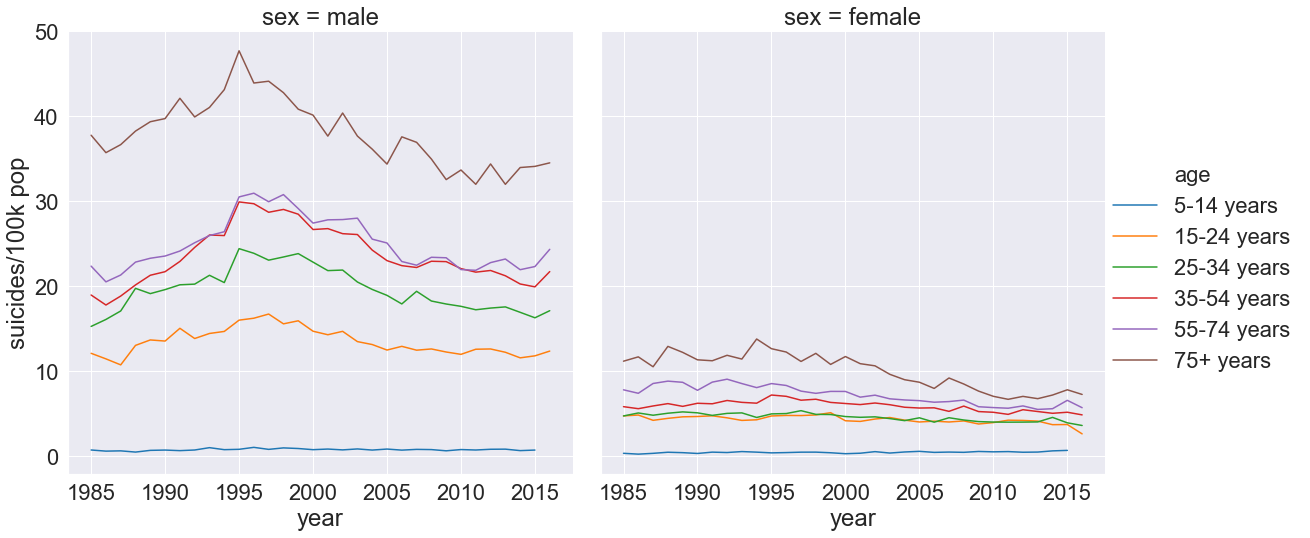

In [16]:
#age by gender lineplot
age_order=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']
sns.set(font_scale=2,style='darkgrid')
g=sns.relplot(x = 'year',y='suicides/100k pop',col='sex',hue='age',kind='line',data=df_new,estimator='mean',ci=None,palette="tab10",
            hue_order=age_order,height =8, aspect =1)
g.savefig("age_plot.tiff");

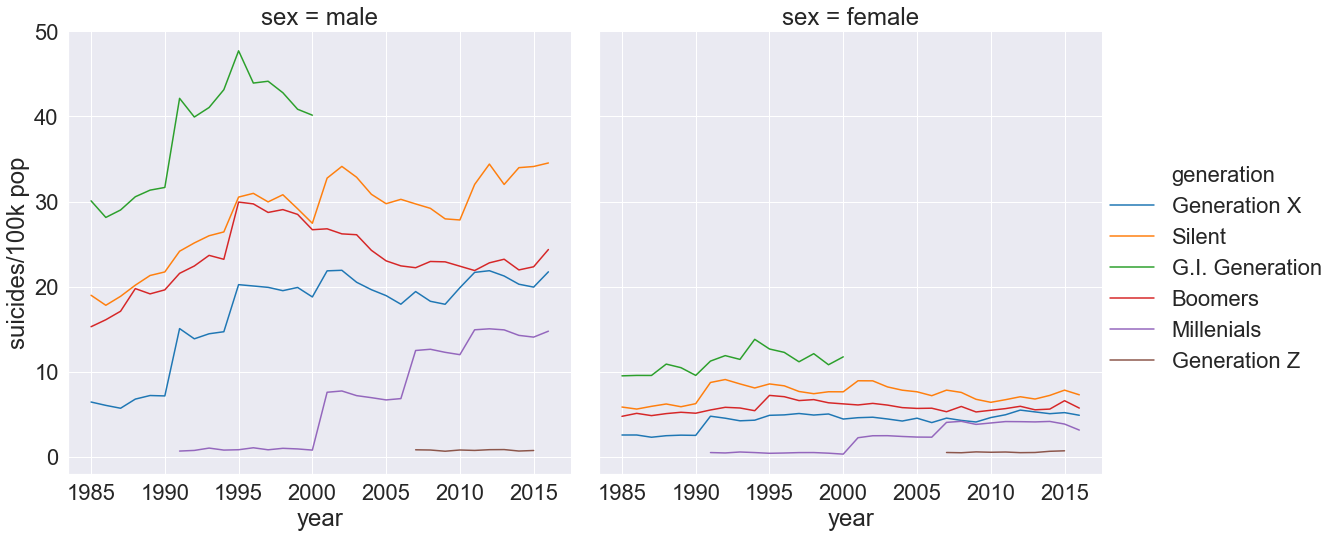

In [17]:
#gender by generation linplot (did not include in the project)
sns.set(font_scale=2,style='darkgrid')
g=sns.relplot(x = 'year',y='suicides/100k pop',col='sex',hue='generation',kind='line',data=df_new,estimator='mean',ci=None,palette="tab10",
            height =8, aspect =1)
g.savefig("generation_plot.pdf");

In [18]:
df_new.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
gdp_per_capita ($)      int64
generation             object
dtype: object

In [19]:
#select all numerical columns
df_corr=df_new[df_new.select_dtypes(include=['float64','int64']).columns]

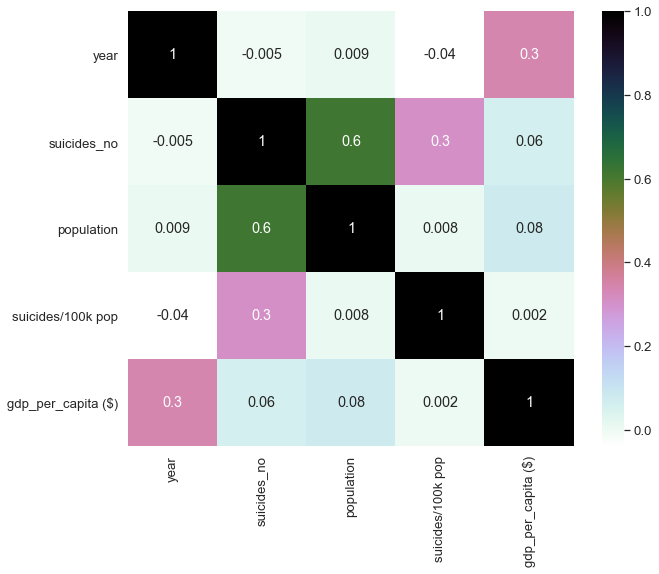

In [27]:
#correlation maxtrix
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
htmp=sns.heatmap(df_corr.corr(),annot=True,fmt='.1g',cmap='cubehelix_r')
figure=htmp.get_figure()
figure.savefig("Figure 4.jpg",bbox_inches='tight')

In [21]:
#create dummies for cat cols
def clean_data(df):
    X=df.drop(['suicides/100k pop'],axis=1)
    y=df['suicides/100k pop']
    cat_cols=X.select_dtypes(include=['object']).copy().columns
    for col in cat_cols:
        X = pd.concat([X.drop(col,axis=1),pd.get_dummies(X[col],prefix=col,prefix_sep='_',
                                                         drop_first=True,dummy_na=False)],axis=1)
    return X,y
X,y=clean_data(df_new)

In [22]:
X.head()

,year,suicides_no,population,gdp_per_capita ($),country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,...,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21,312900,796,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,1987,16,308000,796,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1987,14,289700,796,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1987,1,21800,796,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
4,1987,9,274300,796,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [23]:
#fit lineargregression model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)
lm_model=LinearRegression(normalize=True)
lm_model.fit(X_train,y_train)
y_train_preds=lm_model.predict(X_train)
y_test_preds=lm_model.predict(X_test)
train_score=r2_score(y_train,y_train_preds)
test_score=r2_score(y_test,y_test_preds)
print("The rsquared on the training data was {}.  The rsquared on the test data was {}.".format(train_score, test_score))

The rsquared on the training data was 0.5518061726684329.  The rsquared on the test data was 0.5398306148087779.


In [24]:
X_train.shape

(19474, 115)

In [30]:
#list top 50 predictors
def coef_weights(coefficients,X_train):
    coefs_df=pd.DataFrame()
    coefs_df['est_int']=X_train.columns
    coefs_df['coefs']=lm_model.coef_
    coefs_df['abs_coefs']=np.abs(lm_model.coef_)
    coefs_df=coefs_df.sort_values('abs_coefs',ascending=False)
    return coefs_df
coef_df=coef_weights(lm_model.coef_,X_train)
coef50=coef_df.head(50)
coef50

,est_int,coefs,abs_coefs
55,country_Lithuania,37.485137,37.485137
90,country_Sri Lanka,31.922419,31.922419
54,country_Latvia,28.714357,28.714357
43,country_Hungary,28.602130,28.602130
14,country_Belarus,27.908807,27.908807
87,country_Slovenia,27.153924,27.153924
50,country_Kazakhstan,26.448476,26.448476
33,country_Estonia,24.958765,24.958765
9,country_Austria,23.850002,23.850002
35,country_Finland,23.612371,23.612371


In [ ]:
coef50.to_csv("coef50.csv")